In [1]:
from mitotic_classifer import *

# Running SVM model with file:#
## check the number of M and G2 cells

In [2]:
df_ori=pd.read_csv('/Users/haoranyue/Desktop/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS/single_cell_data/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_final_data.csv')
df_cellcyle=pd.read_csv('/Users/haoranyue/Downloads/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_singlecell_cellcycle.csv')

df_cellcyle.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,24288,24288,24288,24288,24288,24288,24288,24288,24288,24288,...,24288,24288,24288,24288,24288,24288,24288,24288,24288,24288
G1,92840,92840,92840,92840,92840,92840,92840,92840,92840,92840,...,92840,92840,92840,92840,92840,92840,92840,92840,92840,92840
G2,35363,35363,35363,35363,35363,35363,35363,35363,35363,35363,...,35363,35363,35363,35363,35363,35363,35363,35363,35363,35363
Late S,16978,16978,16978,16978,16978,16978,16978,16978,16978,16978,...,16978,16978,16978,16978,16978,16978,16978,16978,16978,16978
M,2459,2459,2459,2459,2459,2459,2459,2459,2459,2459,...,2459,2459,2459,2459,2459,2459,2459,2459,2459,2459
Polyploid,7415,7415,7415,7415,7415,7415,7415,7415,7415,7415,...,7415,7415,7415,7415,7415,7415,7415,7415,7415,7415
Polyploid (replicating),3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,...,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799
Sub-G1,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921,...,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921


## Merge two files

In [3]:
df_all=merge_data(df1=df_ori,df2=df_cellcyle,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed,cell_cycle
0,0.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,13.0,136.0,...,0.968335,-0.046422,0.949624,-0.074571,1.462911,0.548842,1.120828,0.164565,G2,G2/M
1,1.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,16.0,147.0,...,0.917730,-0.123858,0.929528,-0.105430,2.604441,1.380974,1.211483,0.276774,G1,G1
2,2.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,17.0,98.0,...,4.848917,2.277662,0.985389,-0.021235,1.033012,0.046856,0.807655,-0.308188,Late S,S
3,5.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,20.0,203.0,...,1.000066,0.000095,0.952695,-0.069913,1.938723,0.955107,1.673000,0.742438,Polyploid,Polyploid
4,4.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,19.0,130.0,...,1.003778,0.005440,0.969189,-0.045151,1.755076,0.811534,1.071380,0.099470,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,262.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,304.0,314.0,...,0.968910,-0.045565,0.985267,-0.021413,1.205830,0.270027,1.851099,0.888382,G2,G2/M
1783,261.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,303.0,246.0,...,2.431181,1.281657,1.023444,0.033433,1.647256,0.720065,1.450224,0.536276,Late S,S
1784,265.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,308.0,309.0,...,1.039146,0.055399,0.993885,-0.008849,1.224424,0.292103,1.821623,0.865224,G2,G2/M
1785,267.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,311.0,473.0,...,1.100063,0.137586,1.009845,0.014134,2.805569,1.488294,2.788439,1.479458,Polyploid,Polyploid


In [4]:
df_all.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771,...,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771
G1,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081,...,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081
G2,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261,...,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261
Late S,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347,...,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347
M,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,...,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
Polyploid,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982,...,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982
Polyploid (replicating),1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,...,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
Sub-G1,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640,...,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640


## select all the M cell and equal number G2 cells, extracting the interesting columns making a dataset for training

In [5]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(2156)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,U2OS,NT,737.0,306.0,10772.467188,8774.261561,2.684924e+06,959.0,10772.467188,4294.012187,...,6951.780758,14838.906881,7748.830194,1,2.684924e+06,3.805941,1.011673,1.493890,1.863037,G2
1,MM231,NT,586.0,109.0,28280.035142,20401.258609,2.223737e+06,434.0,28280.035142,8256.831010,...,11167.546682,18203.836515,10719.374358,1,2.223737e+06,3.640101,1.060227,0.905711,0.898311,G2
2,U2OS,siCdc27,54.0,166.0,37090.584368,18391.788690,3.053037e+06,382.0,37090.584368,10289.681012,...,23529.402851,58548.867912,11080.933374,1,3.053037e+06,4.327749,1.167885,0.595064,1.010667,M
3,RPE-1,siCdc27,111.0,171.0,31429.374117,14166.844815,2.422530e+06,356.0,31429.374117,8555.486182,...,11754.499512,14640.662562,6793.700581,1,2.422530e+06,4.558262,1.069226,0.245160,1.008083,M
4,U2OS,NT,388.0,237.0,13443.766252,10756.609317,2.549316e+06,614.0,13443.766252,5449.599767,...,7757.310898,15732.710539,8430.535270,1,2.549316e+06,3.613714,1.365058,0.956463,1.442940,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,RPE-1,siCtr,429.0,208.0,14288.500343,10220.045760,2.125770e+06,1358.0,14288.500343,2817.038892,...,7471.809329,14853.827304,6986.045181,1,2.125770e+06,3.999873,1.011413,0.935190,1.226206,M
4308,RPE-1,siCdc27,382.0,327.0,9069.248730,6526.711535,2.134235e+06,2804.0,9069.248730,1808.557726,...,5959.304766,15997.019529,6066.431502,1,2.134235e+06,4.015801,0.969122,1.930981,1.927737,G2
4309,MM231,NT,45.0,186.0,17372.738413,11960.018955,2.224564e+06,913.0,17372.738413,4083.001853,...,10197.112789,23444.251919,10124.727254,1,2.224564e+06,3.641454,0.950397,1.905333,1.532897,G2
4310,U2OS,NT,400.0,228.0,13576.462678,10287.301439,2.345505e+06,1187.0,13576.462678,3128.837591,...,8794.800293,19075.697823,8642.201979,1,2.345505e+06,3.324806,1.042425,1.849059,1.388145,G2


# input data (2156 G2 cell + 2156 M cell)
##  cross validation

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.92013889 0.95138889 0.93402778 0.94791667 0.94773519 0.92682927
 0.95470383 0.93728223 0.96864111 0.94425087]  Mean:0.9432914730933024


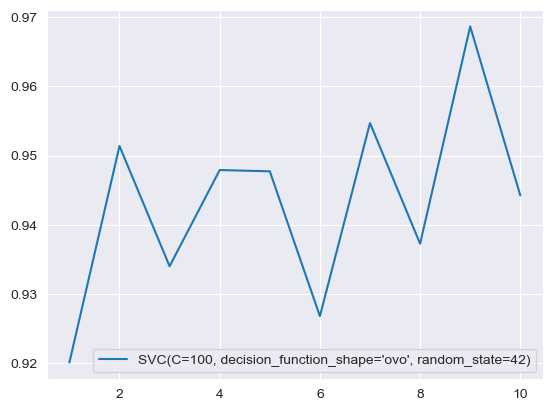

In [6]:
x_train,x_test,y_train,y_test =preprecess_classifier(data=data)

In [8]:
#using the GridSearchCV to select the best hyperparameters

clf_svm = svm.SVC( random_state=24)
clf_svm_hp =GridSearchCV(clf_svm,{'C':[0.1,10,100],"gamma":['scale','auto'],'decision_function_shape':['ovo','ovr'],},cv=5,return_train_score=True)
clf_svm_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_svm_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.154135,0.027966,0.057160,0.011176,0.1,ovo,scale,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.546087,0.551304,...,0.564377,0.014836,5,0.565463,0.564158,0.559374,0.564158,0.561304,0.562892,0.002223
1,0.104430,0.002195,0.044803,0.000339,0.1,ovo,auto,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
2,0.129849,0.001727,0.050043,0.001015,0.1,ovr,scale,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.546087,0.551304,...,0.564377,0.014836,5,0.565463,0.564158,0.559374,0.564158,0.561304,0.562892,0.002223
3,0.102318,0.000498,0.044811,0.000182,0.1,ovr,auto,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
4,0.076547,0.001583,0.029393,0.000659,10,ovo,scale,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.897391,0.918261,...,0.896659,0.012379,3,0.894737,0.891692,0.901696,0.899522,0.896087,0.896747,0.003528
5,0.107739,0.002895,0.044721,0.000325,10,ovo,auto,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.075352,0.000908,0.029013,0.000340,10,ovr,scale,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.897391,0.918261,...,0.896659,0.012379,3,0.894737,0.891692,0.901696,0.899522,0.896087,0.896747,0.003528
7,0.107186,0.002886,0.044641,0.000092,10,ovr,auto,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.049170,0.000973,0.016860,0.000152,100,ovo,scale,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.918261,0.939130,...,0.922407,0.008848,1,0.923010,0.918660,0.923010,0.923445,0.922609,0.922147,0.001763
9,0.107201,0.002967,0.044789,0.000177,100,ovo,auto,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [9]:
clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
clf_rf_hp =GridSearchCV(clf_rf,{"n_estimators":[30,40,50,60,70,80,90,100],"criterion":['entropy','log_loss'],'max_features':['sqrt','log2',],'class_weight':['balanced', 'balanced_subsample']},cv=5,return_train_score=True)
clf_rf_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_rf_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.104675,0.013023,0.003336,0.000458,balanced,entropy,sqrt,30,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.939804,0.003242,41,0.999565,0.999130,0.999130,0.999130,0.99913,0.999217,0.000174
1,0.128809,0.010494,0.003484,0.000059,balanced,entropy,sqrt,40,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.939802,0.006309,45,1.000000,0.999130,0.999565,0.999565,1.00000,0.999652,0.000326
2,0.155632,0.004385,0.004105,0.000320,balanced,entropy,sqrt,50,"{'class_weight': 'balanced', 'criterion': 'ent...",0.937391,...,0.940498,0.006489,25,1.000000,0.999565,1.000000,1.000000,1.00000,0.999913,0.000174
3,0.182327,0.001748,0.004492,0.000054,balanced,entropy,sqrt,60,"{'class_weight': 'balanced', 'criterion': 'ent...",0.937391,...,0.940498,0.006763,25,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,0.226705,0.029221,0.005175,0.000247,balanced,entropy,sqrt,70,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.940149,0.006787,37,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.205552,0.004281,0.004579,0.000086,balanced_subsample,log_loss,log2,60,"{'class_weight': 'balanced_subsample', 'criter...",0.946087,...,0.941889,0.007301,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
60,0.239063,0.003193,0.005212,0.000189,balanced_subsample,log_loss,log2,70,"{'class_weight': 'balanced_subsample', 'criter...",0.944348,...,0.939453,0.006585,49,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
61,0.272959,0.004020,0.005758,0.000187,balanced_subsample,log_loss,log2,80,"{'class_weight': 'balanced_subsample', 'criter...",0.944348,...,0.941541,0.005928,5,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
62,0.306284,0.002781,0.006386,0.000061,balanced_subsample,log_loss,log2,90,"{'class_weight': 'balanced_subsample', 'criter...",0.940870,...,0.941193,0.006854,9,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000


# RandomForestClassifier

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9541029207232267


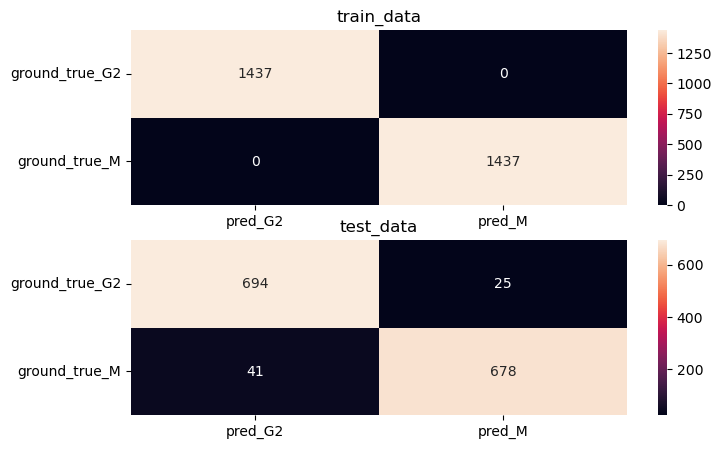

In [10]:
clf_rf_hp = RandomForestClassifier(random_state=11,n_estimators=70,max_features='sqrt',criterion='entropy',class_weight='balanced')
check_classifier(clf=clf_rf_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# SVM

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.93402778 0.90972222 0.97569444 0.94444444 0.94425087 0.95121951
 0.95818815 0.95121951 0.95121951 0.93031359]  Mean:0.9450300038714673


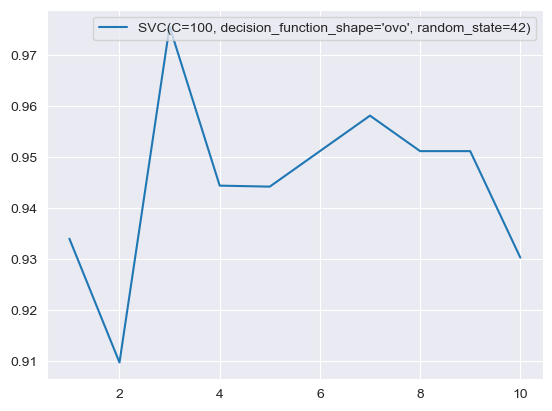

the accuracy of model run with train data 0.9749478079331941
the accuracy of model run with test data 0.9429763560500696


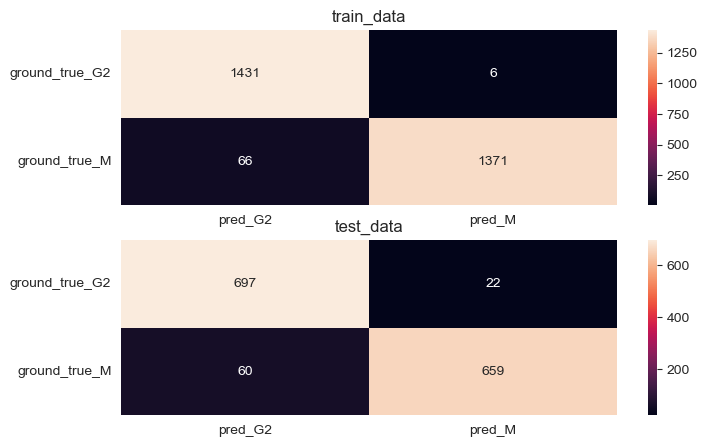

In [8]:


x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)





the accuracy of model run with train data 0.9749478079331941
the accuracy of model run with test data 0.9429763560500696


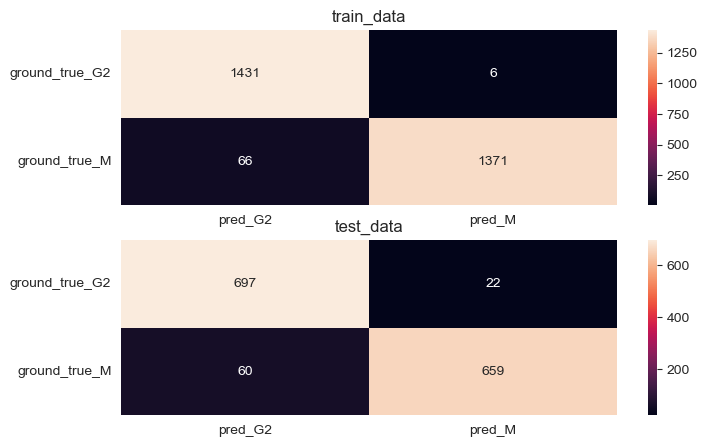

In [9]:
from joblib import dump, load
dump(clf_svm_hp, 'pretrained_SVM_U20S_without_edu.joblib')
pretrained_svm=load('pretrained_SVM_U20S_without_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

In [7]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(2156)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
        'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,RPE-1,siCdc27,299.0,138.0,44329.776234,17011.010100,2.347519e+06,292.0,44329.776234,10214.825244,...,15829.490630,31616.741149,11064.208402,1,2.347519e+06,4.417120,1.072833,0.201086,0.813540,M
1,U2OS,siCdc27,296.0,114.0,44754.165680,23018.411007,2.624099e+06,288.0,44754.165680,12559.110200,...,16608.413424,24210.647981,10247.866730,1,2.624099e+06,3.719719,1.238014,0.448634,0.694073,M
2,RPE-1,siCdc27,271.0,190.0,41304.033244,13049.736332,2.479450e+06,402.0,41304.033244,8034.351926,...,11879.302945,25933.856391,7561.330249,1,2.479450e+06,4.665362,1.089127,0.276838,1.120092,M
3,MM231,NT,230.0,158.0,19364.585278,14496.554088,2.290456e+06,1040.0,19364.585278,4289.243179,...,9623.372326,17018.538187,9344.142101,1,2.290456e+06,3.749314,1.172416,2.170368,1.302138,G2
4,MM231,NT,356.0,140.0,21658.198128,16160.405669,2.262457e+06,673.0,21658.198128,5572.540113,...,12034.723490,24634.242467,12037.259403,1,2.262457e+06,3.703482,0.984929,1.404478,1.153793,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,U2OS,siCdc27,36.0,120.0,31575.882546,20290.088539,2.434811e+06,325.0,31575.882546,10414.359849,...,12530.406418,17780.397060,7592.578629,1,2.434811e+06,3.451399,1.044169,0.506271,0.730603,M
4308,U2OS,siCtr,105.0,173.0,22462.458419,16758.543474,2.899228e+06,464.0,22462.458419,8415.478979,...,9730.368998,18936.858902,10265.591387,1,2.899228e+06,4.109721,0.762830,0.722800,1.053285,M
4309,RPE-1,siCdc27,74.0,224.0,10803.404726,8241.300692,1.846051e+06,1945.0,10803.404726,2033.880583,...,6582.349504,16343.703607,6503.600771,1,1.846051e+06,3.473552,1.004330,1.339429,1.320529,G2
4310,RPE-1,siCdc27,90.0,329.0,9769.490540,7334.945266,2.413197e+06,4327.0,9769.490540,1529.486495,...,7619.251923,24322.671805,7579.078026,1,2.413197e+06,4.540700,1.036712,2.979798,1.939527,G2


the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.94791667 0.9375     0.94791667 0.9375     0.92682927 0.96864111
 0.93031359 0.94076655 0.93379791 0.94773519]  Mean:0.9418916957026712


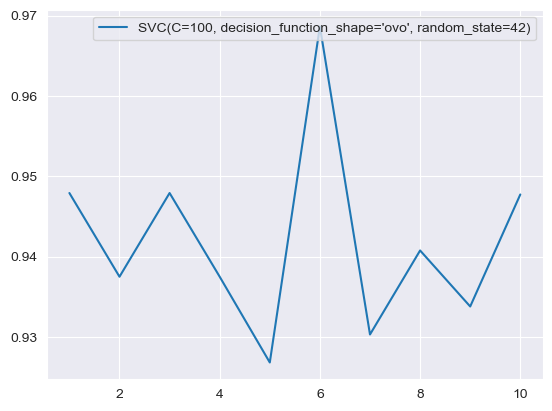

the accuracy of model run with train data 0.9839944328462074
the accuracy of model run with test data 0.9492350486787204


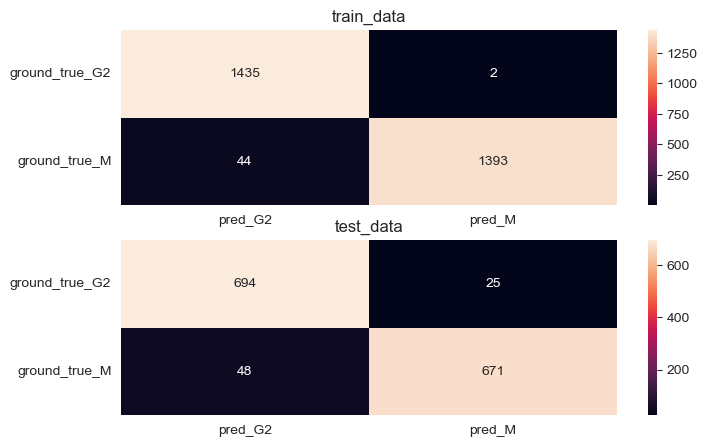

In [8]:


x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

the accuracy of model run with train data 0.9839944328462074
the accuracy of model run with test data 0.9492350486787204


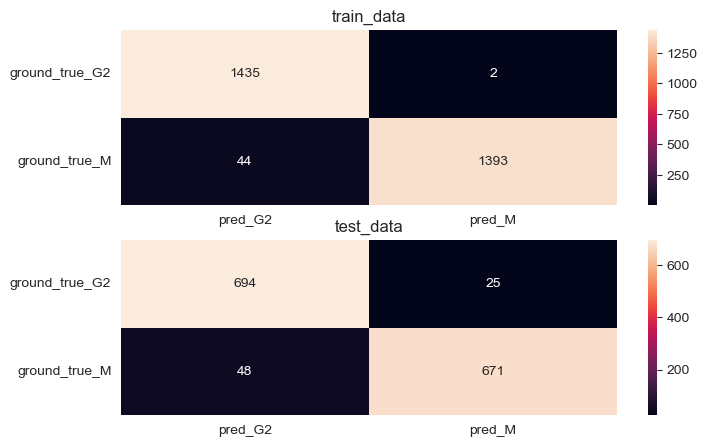

In [9]:
from joblib import dump, load
dump(clf_svm_hp, 'pretrained_SVM_U20S_with_edu.joblib')
pretrained_svm=load('pretrained_SVM_U20S_with_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)